분석

UCI Machine Learning Repository에서 온라인 판매 데이터를 다운로드하였다.

이 데이터는 영국 온라인 소매 플랫폼에서 2010년 12월 1일 ~ 2011년 12월 9일까지 발생한 실제 거래 데이터 541,909개이다.

<br>
데이터를 구성하는 항목

*   InvoiceNo: 6자리 정수로 이루어진 송장 번호, 'C'로 시작하는 것은 취소 주문
*   StockCode: 제품 고유의 품목 코드
*   Description: 제품 설명
*   Quantity: 주문 수량
*   InvoiceDate: 주문 날짜와 시간
*   UnitPrice: 제품 단가(단위: 영국 파운드)
*   CustomerID: 주문 고객 번호
*   Country: 주문 고객의 국적



In [ ]:
import pandas as pd
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS Project 2024/week04/Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


### 데이터 정제

In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 오류 데이터 정제
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df = df[df['CustomerID'].notnull()]

df['CunstomerID'] = df['CustomerID'].astype(int)

In [ ]:
df.info()
print("\n")

df.isnull().sum()
print("\n")

df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
 8   CunstomerID  397884 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 30.4+ MB






(397884, 9)

In [ ]:
# 중복 레코드 제거
df.drop_duplicates(inplace = True)
df.shape

(392692, 9)

### column 추출 및 분석용 데이터 생성

In [ ]:
# 제품 수, 거래 건수, 고객 수를 알아봄
pd.DataFrame([{'Product':len(df['StockCode'].value_counts()), 'Transaction':len(df['InvoiceNo'].value_counts()), 'Customer':len(df['CustomerID'].value_counts())}], columns = ['Product', 'Transaction', 'Customer'], index = ['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [ ]:
# 고객의 국적 빈도
df['Country'].value_counts()

United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [ ]:
# 주문 금액 열 추가
df['SaleAmount'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CunstomerID,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,17850,20.34


In [ ]:
# CustomerID를 기준으로 그룹을 만듦
# 주문 횟수, 주문 금액의 총액, 주문일 중 최근 날짜를 찾아 새로운 데이터프레임 객체 생성
aggregations = {
    'InvoiceNo':'count',
    'SaleAmount':'sum',
    'InvoiceDate':'max'
}

customer_df = df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346.0,1,77183.60,2011-01-18 10:01
1,12347.0,182,4310.00,2011-12-07 15:52
2,12348.0,31,1797.24,2011-09-25 13:13
3,12349.0,73,1757.55,2011-11-21 9:51
4,12350.0,17,334.40,2011-02-02 16:01


In [ ]:
# 컬럼 이름 변경
customer_df = customer_df.rename(columns = {'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,2011-01-18 10:01
1,12347.0,182,4310.00,2011-12-07 15:52
2,12348.0,31,1797.24,2011-09-25 13:13
3,12349.0,73,1757.55,2011-11-21 9:51
4,12350.0,17,334.40,2011-02-02 16:01


In [ ]:
# 기준 날짜 - 마지막 구매일 계산
import datetime

customer_df['ElapsedDays'] = pd.to_datetime(customer_df['ElapsedDays'])

customer_df['ElapsedDays'] = (datetime.datetime(2011, 12, 10).date() - customer_df['ElapsedDays'].dt.date).dt.days

customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346.0,1,77183.60,326
1,12347.0,182,4310.00,3
2,12348.0,31,1797.24,76
3,12349.0,73,1757.55,19
4,12350.0,17,334.40,311


### 데이터 분포 조정

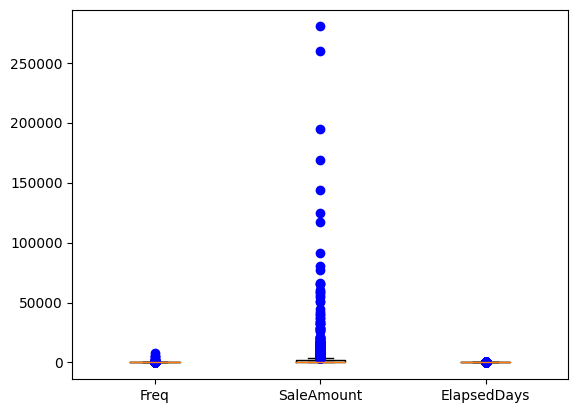

In [ ]:
# 박스플롯 그려 데이터 값이 한쪽으로 치우치지 않았는지 확인
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()



*   아웃레이어 값이 많음 => 데이터 값이 고르게 분포하지 않고 치우쳐져 있음



In [ ]:
# 로그 함수 적용해 값의 분포를 고르게 조정
import numpy as np

customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346.0,1,77183.60,326,0.693147,11.253955,5.789960
1,12347.0,182,4310.00,3,5.209486,8.368925,1.386294
2,12348.0,31,1797.24,76,3.465736,7.494564,4.343805
3,12349.0,73,1757.55,19,4.304065,7.472245,2.995732
4,12350.0,17,334.40,311,2.890372,5.815324,5.743003


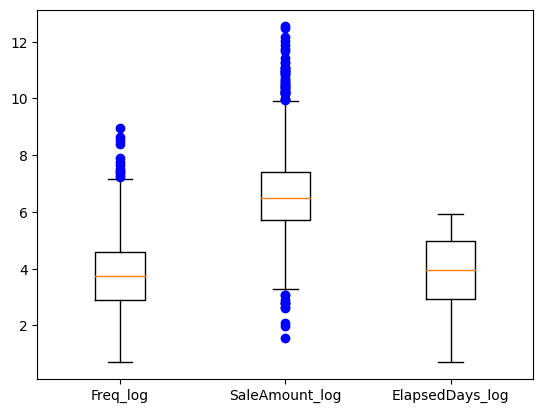

In [ ]:
# 박스플롯 그려서 확인
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym = 'bo')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()



*   이전보다 아웃레이어가 줄어들었음



## 분석 모델 구축

### K-Means 군집화 모델

In [ ]:
# K-Means 군집화 모델링과 실루엣 계수 계산에 사용할 모듈 임포트
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']].values

# X_features를 정규 분포로 스케일링
from sklearn.preprocessing import StandardScaler
X_features_scaled = StandardScaler().fit_transform(X_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

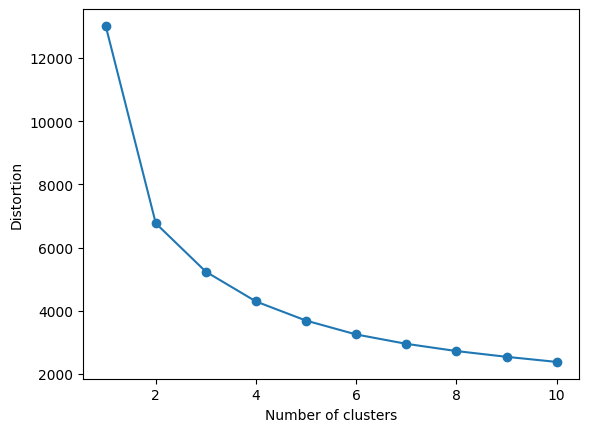

In [ ]:
# 엘보 방법으로 K-Means 모델에 적당한 클러스터 k 개수 선택
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0)
    kmeans_i.fit(X_features_scaled)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

* 엘보 지점은 3 또는 4, 5가 될 수 있을 것 같음
* 클러스터 k의 개수를 3으로 설정

In [ ]:
# 클러스터의 개수를 3으로 설정하고 K-Means 군집화 모델을 생성
kmeans = KMeans(n_clusters=3, random_state=0)
Y_labels = kmeans.fit_predict(X_features_scaled)  # 클러스터에 대한 레이블 예측값

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customer_df['ClusterLabel'] = Y_labels
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346.0,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347.0,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348.0,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349.0,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350.0,17,334.40,311,2.890372,5.815324,5.743003,0


## 결과 분석 및 시각화

### 클러스터의 비중과 데이터 분포를 차트로 시각화

In [ ]:
# 실루엣 계수를 구함
# 각 클러스터의 비중을 바 차트로 시각화하기 위한 silhouette 함수 정의
from matplotlib import cm

def silhouetteViz(n_cluster, X_features, ax):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init=10)
    Y_labels = kmeans.fit_predict(X_features)

    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        ax.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)

    silhouette_avg = np.mean(silhouette_values)
    ax.axvline(silhouette_avg, color='red', linestyle='--')
    ax.set_title('Number of Cluster : ' + str(n_cluster) + '\n' + 'Silhouette Score : ' + str(round(silhouette_avg, 3)))
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(range(n_cluster))
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylabel('Cluster')
    ax.set_xlabel('Silhouette coefficient')
    plt.show()

In [ ]:
# 클러스터에 대한 데이터의 분포를 스캐터 차트로 시각화하기 위한 clusterScatter 함수 정의
def clusterScatter(n_cluster, X_features, ax):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)

        ax.scatter(X_features[Y_labels == i, 0], X_features[Y_labels == i, 1], marker='o', color=c_color, edgecolor='black', s=50, label='cluster ' + str(i))

    for i in range(n_cluster):
        ax.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='^', color=c_colors[i], edgecolor='w', s=200)
        ax.legend()
        ax.grid()

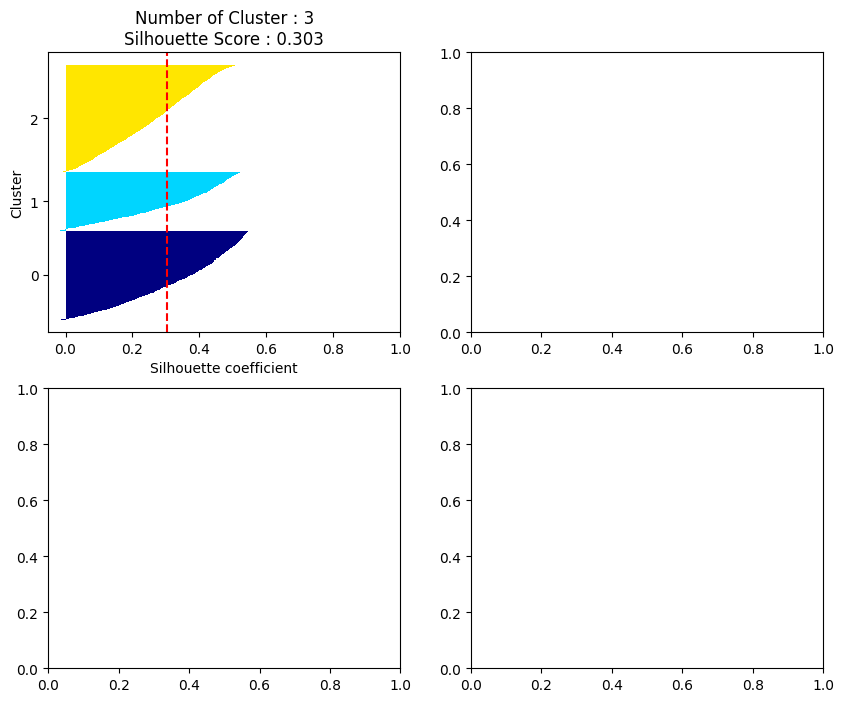

<Figure size 640x480 with 0 Axes>

In [ ]:
# 클러스터 개수가 3, 4, 5, 6인 경우의 실루엣 개수와 각 클러스터의 비중을 시각화하여 비교
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

silhouetteViz(3, X_features_scaled, axs[0, 0])
silhouetteViz(4, X_features_scaled, axs[0, 1])
silhouetteViz(5, X_features_scaled, axs[1, 0])
silhouetteViz(6, X_features_scaled, axs[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
silhouetteViz(4, X_features_scaled, axs[0, 1])

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* 클러스터의 비중이 한쪽으로 치우치지 않고 비슷하면서 실루엣 계수가 높은 것은
클러스터의 개수가 4개인 경우이다.
* 이때의 실루엣 계수는 0.309

In [ ]:
# 클러스터의 데이터 분포와 클러스터의 중심점 위치를 시각화하여 비교
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

clusterScatter(3, X_features_scaled, axs[0, 0])
clusterScatter(4, X_features_scaled, axs[0, 1])
clusterScatter(5, X_features_scaled, axs[1, 0])
clusterScatter(6, X_features_scaled, axs[1, 1])

plt.tight_layout()
plt.show()


* 데이터가 섞이지 않고 같은 클러스터끼리 모여 있는 형태로 나타난 것을 보아 군집화가 잘 되었음

In [ ]:
# 최적의 K-Means 군집화 모델의 레이블 예측값을 구함
best_cluster = 4
kmeans = KMeans(n_clusters = best_cluster, random_state = 0)
Y_lables = kmeans.fit_predict(X_features_scaled)

In [ ]:
customer_df['ClusterLabel'] = Y_labels
customer_df.head()

### 추가 분석

In [ ]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

In [ ]:
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'], axis=1, inplace=False)

In [ ]:
# 주문 1회당 평균 구매 금액
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount']/customer_cluster_df['Freq']
customer_cluster_df.head()

In [ ]:
customer_cluster_df.drop(['CustomerID'], axis=1, inplace=False).groupby('ClusterLabel').mean()

* 고객 클러스터 1은 구매 횟수는 월등히 높게 나타났지만 구매당 평균 금액은 두 번째이다.
* 구매당 평균 금액은 고객 클러스터 3이 가장 높다.

* 구매 빈도가 높을수록 가격 평균은 낮게 나타남
* 구매 빈도가 낮을수록 가격 평균은 높게 나타남

### 마케팅 전략

* 구매 횟수가 많지만 평균 금액이 낮은 클러스터에게는 저가 상품을 중심으로 한 프로모션을 진행할 수 있을 것이다.
* 구매당 평균 금액이 높은 클러스터에게는 프리미엄 상품이나 추가 서비스를 제안할 수 있을 것이다.
* 이전에 구매한 상품과 관련된 상품을 추천하는 등의 리타겟팅 전략을 구매 횟수가 높은 클러스터에게 적용할 수 있을 것이다.
* 각 클러스터의 특성에 맞는 할인 및 이벤트를 기획하여 구매 유도를 촉진할 수 있을 것이다.
* 판촉 메일을 보내는 시기와 간격을 조절할 수 있을 것이다.



### 추가 분석

* 고객 주소를 포함한 데이터를 수집하여 지리 정보 분석을 활용해, 고객의 주소를 지도에 시각화하고 고객 클러스터에 따른 지리적 특성을 분석할 수 있을 것이다.

* 고객의 구매 패턴을 분석하여 특정 상품이나 카테고리에 대한 선호도를 파악하여, 향후 상품의 선정이나 재고 관리에 도움이 될 수 있을 것이다.

* 이전에 활발하게 거래를 하던 고객이 이탈할 가능성을 예측하여 이를 방지하기 위한 전략을 수립할 수 있다. 예를 들어, 이탈 가능성이 높은 고객에게 할인 혜택을 제공하거나 개인화된 서비스를 제공할 수 있을 것이다.

* 다양한 마케팅 채널을 활용하여 고객을 유입시키는데, 어떤 채널이 가장 효율적인지를 분석할 수 있다.. 이를 통해 마케팅 예산을 효율적으로 배분하고 비용을 줄일 수 있을 것이다.

* 고객의 이전 구매 이력을 바탕으로 상품 추천 시스템을 구축하여 고객에게 맞춤형 추천을 제공할 수 있다. 이를 통해 고객 만족도를 높이고 재구매율을 증가시킬 수 있을 것이다.

* 시간대별로 고객의 구매 패턴을 분석하여 특정 시간대에 구매가 활발하거나 소규모 주문이 많은지 등을 파악할 수 있다. 이를 통해 재고 관리나 인력 배치 등을 최적화할 수 있을 것이다.

* 특정 프로모션 또는 할인 행사가 고객의 구매 행동에 미치는 영향을 분석하여 효과적인 마케팅 전략을 수립할 수 있다. 이를 통해 향후 프로모션의 계획을 세우거나 개선할 수 있을 것이다.